## Adagrad
Until now the learning rate $(\alpha)$ is same for all iteration and same learning rate for all the input x vales (x1,x2,x3,...)
if some feature has sparse vector( most of thr values are 0 only few values have 1) and if the learning rate is constant means for the sparse vector column the weights will not update in most of the case

if x1 = [1,0,0,1,0,0,0,0,0,1], x2 = [1,0.8,34,382,....] and loss function is MSE and it's derivation is $2*x*error$

x1 is sparse and x2 is dense

Our weight updation fourmula is $wx1=wx1-learningRate * \nabla err$,

$\nabla err = 2 * x1 * err$ if x1 is 0 means gradient also 0 so the weight updation will not  happen $wx1=wx1-learningRate * (2 * 0 * err) = wx1 - 0 = wx1$

Our weight updation fourmula is $wx2=wx2-learningRate * \nabla err$, 

$\nabla err = 2 * x2 * err$ for x2 the values are dense vector so weight updation will happen all the times. for dense column weights are updating fast $wx2=wx2-learningRate * (2 * some\_value * err) = wx1 - some\_value = change\_in\_weight$

Due to the issue of sparse vetcor some feature has slow learning. To solve this issue Adagrad will calculate different learning rate for different feature (x1, x2, x3,...)

Adagrad will reduce the learning rate if previous weight is updated

In adagrad if a feature is updating means reduce the learning rate, else maintain the learning rate

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Adagrad
$$
Gerr = \sum_{i=0}^{n} \nabla err^i * \nabla err^i\\
lrCalc = \frac{\eta}{\sqrt{Gerr + \epsilon}} \\
w^i = w^i - lrCalc * \nabla err^i
$$

$$
\eta \rightarrow constatnt\ learning\ rate \\
\epsilon \rightarrow small\ constant\ value\ to\ avoid\ zero\ division \\
\nabla err^i \rightarrow gradient\ at\ the\ i^{th}\ iteration
$$

In [33]:
# check nature of algorithm
def check(gradient,lr = 0.01):

    lr = lr / math.sqrt(( (gradient * gradient)) + 0.000001)
    print(f"Learning Rate {lr}, Weight {gradient}")
    return lr

In [34]:
for i in range(10):
    check(i,0.01)

Learning Rate 10.0, Weight 0
Learning Rate 0.00999999500000375, Weight 1
Learning Rate 0.0049999993750001175, Weight 2
Learning Rate 0.003333333148148164, Weight 3
Learning Rate 0.002499999921875004, Weight 4
Learning Rate 0.001999999960000001, Weight 5
Learning Rate 0.001666666643518519, Weight 6
Learning Rate 0.0014285714139941695, Weight 7
Learning Rate 0.001249999990234375, Weight 8
Learning Rate 0.0011111111042524007, Weight 9


##### From this what clearly visible is if i increase learning rate decrease  

When the weights are updates the learning rate will decrease. If a field value is sparse more num of 0 is present means it's weight is not update so no change in learning rate

In [35]:
lr = 0.01
for i in [1,0,0,1,0,0,1]:
    lr  = check(i,lr)

Learning Rate 0.00999999500000375, Weight 1
Learning Rate 9.99999500000375, Weight 0
Learning Rate 9999.99500000375, Weight 0
Learning Rate 9999.990000009999, Weight 1
Learning Rate 9999990.000009999, Weight 0
Learning Rate 9999990000.009998, Weight 0
Learning Rate 9999985000.018747, Weight 1


In [14]:
def fun(x):
    '''
    x : value
    '''
    return x**2

def grad_fun(x):
    '''
    x : value
    '''
    return (2 * x + 0.00001)

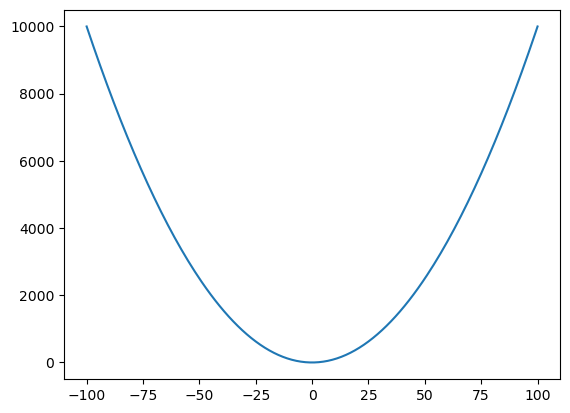

In [17]:
#test place
x = range(-100,101)
y = [fun(i) for i in x]
plt.plot(x,y)
plt.show()

89.81999999
89.64035998002
89.46107925005995
89.28215708155983
89.10359275739671
88.92538556188192
88.74753478075816
88.57003970119665
88.39289961179425
88.21611380257066


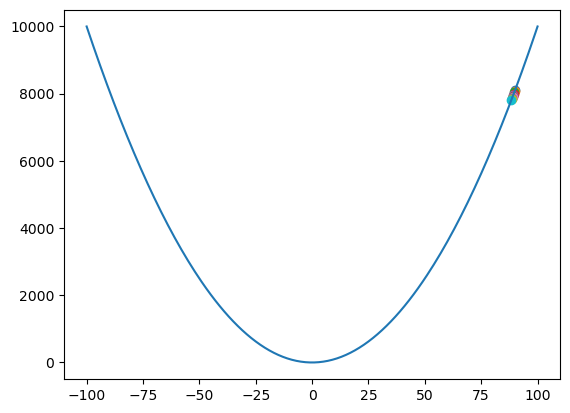

In [18]:
x1 = 90
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    x1 = x1 -( 0.001 * grad_fun(x1))
    y1 = fun(x1)
    print(x1)
plt.show()

In [ ]:
x1 = 90
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    x1 = x1 - ( 0.001 * grad_fun(x1))
    y1 = fun(x1)
    print(x1)
plt.show()